# Prediction about IMDB Ratings of Netflix Contents using Machine Learning Method

Contributors: Celeste Mao (StuID: 56165913) & Jayson Qin (StuID: 72974553)

Task Division: Celeste Mao --- Data cleaning & Analysis part I ............. Jayson Qin --- Analysis part II & Regression modelling


## 1. Introduction

### Background
This Python project focuses on predicting IMDB ratings of Netflix contents using machine learning methods. By analyzing various factors such as kind, genre, country of production, cast, release year, and language, we aim to develop a prediction model. The results from this project will assist content creators, producers, and Netflix in making informed decisions about content acquisition, production, and marketing strategies. By leveraging the power of machine learning, we strive to enhance the overall user experience and provide valuable insights into the factors influencing the ratings.

### Research Questions
Which factors (e.g. kind, genre, country of production, cast, release year, and language) of Netflix contents have impactsabout the user rating? Are the correlations strong or weak? How can the content creators improve the ratings?

### Approaches to Solve the Questions
To solve these questions, we will first analyze the data and visualize the results using numpy, matplotlib, and pandas library. After the data analysis process, we could see some useful trends about ratings which may have correlations with corresponding factors. Then, we can build the machine learning model using linear regression function in sklearn library to make predictions about ratings based on influencing factors.

### Understand the Dataset
The dataset was selected from [Kaggle](https://www.kaggle.com/datasets/akashguna/netflix-prize-shows-information?select=imdb_processed.csv), which was a subset of the Netflix Prize data, with additional rating information scraped from IMDB website. The dataset contains information of approximately 9000 movies and shows available in Netflix prize dataset. 


## 2. Exploratory Data Analysis
This section mainly focuses on data cleaning, analyzing the data and visualize the results. The expected results are that some factors may have correlations with the IMDB ratings, and we will use those factors with relatively strong correlations to make predictions afterwards.

In [1]:
#Import all useful libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", message="DataFrame is highly fragmented")

%config InlineBackend.figure_format='retina'

In [2]:
url = "https://raw.githubusercontent.com/qjl0629/Quant-Econ/main/imdb_processed.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


### Data Cleaning

In [3]:
df.columns

Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')

In [4]:
#drop the unnamed column
df = df.drop("Unnamed: 0", axis=1)
df.head()

,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     8451 non-null   object 
 1   year      8451 non-null   float64
 2   kind      8451 non-null   object 
 3   genre     8384 non-null   object 
 4   rating    8135 non-null   float64
 5   vote      8135 non-null   float64
 6   country   8152 non-null   object 
 7   language  8052 non-null   object 
 8   cast      8280 non-null   object 
 9   director  7140 non-null   object 
 10  composer  5722 non-null   object 
 11  writer    7204 non-null   object 
 12  runtime   6798 non-null   float64
dtypes: float64(4), object(9)
memory usage: 858.4+ KB


In [6]:
df.isnull().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [7]:
df.shape

(8451, 13)

In [8]:
#fill none cell with missing.
df[['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']] = df[['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']].fillna('Missing')
df.dropna(subset=['rating','vote'], inplace=True)
df.dtypes

title        object
year        float64
kind         object
genre        object
rating      float64
vote        float64
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime     float64
dtype: object

In [9]:
df["kind"].value_counts()

movie             4945
video movie       1178
tv movie           737
tv series          605
episode            410
tv mini series     237
tv short            13
video game          10
Name: kind, dtype: int64

The data above shows that there are similar movie types and tv series types listed that could be merged into one main category. I would replace tv mini series to tv series, tv movie and video movie to movies.

In [10]:
#merging detailed described types of movies or tv series into the main category
df.replace(regex=r'tv mini series', value='tv series', inplace=True)
df.replace(regex=r'tv movie', value='movie', inplace=True)
df.replace(regex=r'video movie', value='movie', inplace=True)

In [11]:
df["kind"].value_counts()

movie         6860
tv series      842
episode        410
tv short        13
video game      10
Name: kind, dtype: int64

In [12]:
df['year'] = df['year'].astype(int)
df['rating'] = df['rating'].astype(float)

In [13]:
#remove brackets of titles and names
df['genre'] = df['genre'].str.strip('[]')
df['country'] = df['country'].str.strip('[]')
df['language'] = df['language'].str.strip('[]')
df['director'] = df['director'].str.strip('[]')
df['cast'] = df['cast'].str.strip('[]')
df['writer'] = df['writer'].str.strip('[]')

In [14]:
#remove quotes of names and titles
df['genre'] = df['genre'].str.replace(r"\'","", regex=True)
df['country'] = df['country'].str.replace(r"\'","", regex=True)
df['language'] = df['language'].str.replace(r"\'","", regex=True)
df['director'] = df['director'].str.replace(r"\'","", regex=True)
df['writer'] = df['writer'].str.replace(r"\'","", regex=True)
df['cast'] = df['cast'].str.replace(r"\'","", regex=True)

In [15]:
#focus on the first genre
N = 8

df[[f'genre {x+1}' for x in range(N)]] = (df['genre'].str.split(',', n=N+1, expand=True).iloc[:, :N])

In [16]:
df.rename(columns = {'genre 1':'genre_1'}, inplace = True)

In [17]:
df.columns
df.head()

,title,year,kind,genre,rating,vote,country,language,cast,director,...,writer,runtime,genre_1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,genre 8
0,Dinosaur Planet,2003,tv series,"Documentary, Animation, Family",7.7,474.0,United States,English,"Christian Slater, Scott Sampson",Missing,...,"Mike Carrol, Mike Carroll, Georgann Kane",50.0,Documentary,Animation,Family,None,None,None,None,None
1,Get Up and Dance!,1994,movie,Family,8.1,18.0,United States,English,"Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...",Steve Purcell,...,Missing,83.0,Family,None,None,None,None,None,None,None
2,8 Man,1992,movie,"Action, Sci-Fi",5.5,93.0,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,...,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",NaN,Action,Sci-Fi,None,None,None,None,None,None
3,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432.0,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",...,"William Arntz, Betsy Chasse, Matthew Hoffman",60.0,Documentary,Comedy,Drama,Fantasy,Mystery,Sci-Fi,None,None
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"Comedy, Horror, Sci-Fi",4.5,2177.0,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,...,"Lloyd Kaufman, Carl Morano, Matt Unger",96.0,Comedy,Horror,Sci-Fi,None,None,None,None,None


### The Year Spreads of All the Contents
- How many contents in each year?
- Show the year spread on a bar chart.

In [18]:
df.groupby("year")["title"].count()

year
1914      1
1916      1
1918      3
1919      1
1922      2
       ... 
2001    602
2002    616
2003    655
2004    611
2005    277
Name: title, Length: 88, dtype: int64

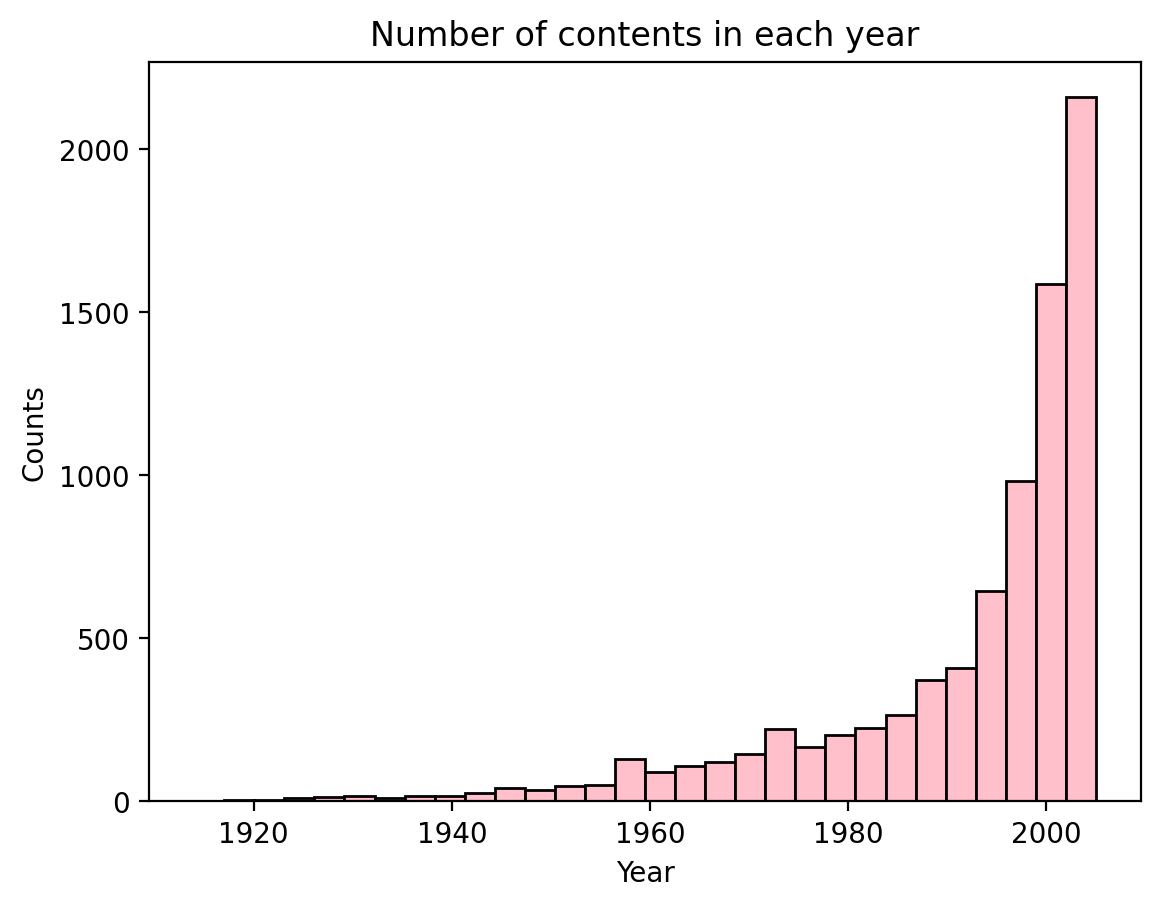

In [19]:
plt.hist(df['year'], bins=30,color="pink",edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Counts")
plt.title('Number of contents in each year')
plt.show()

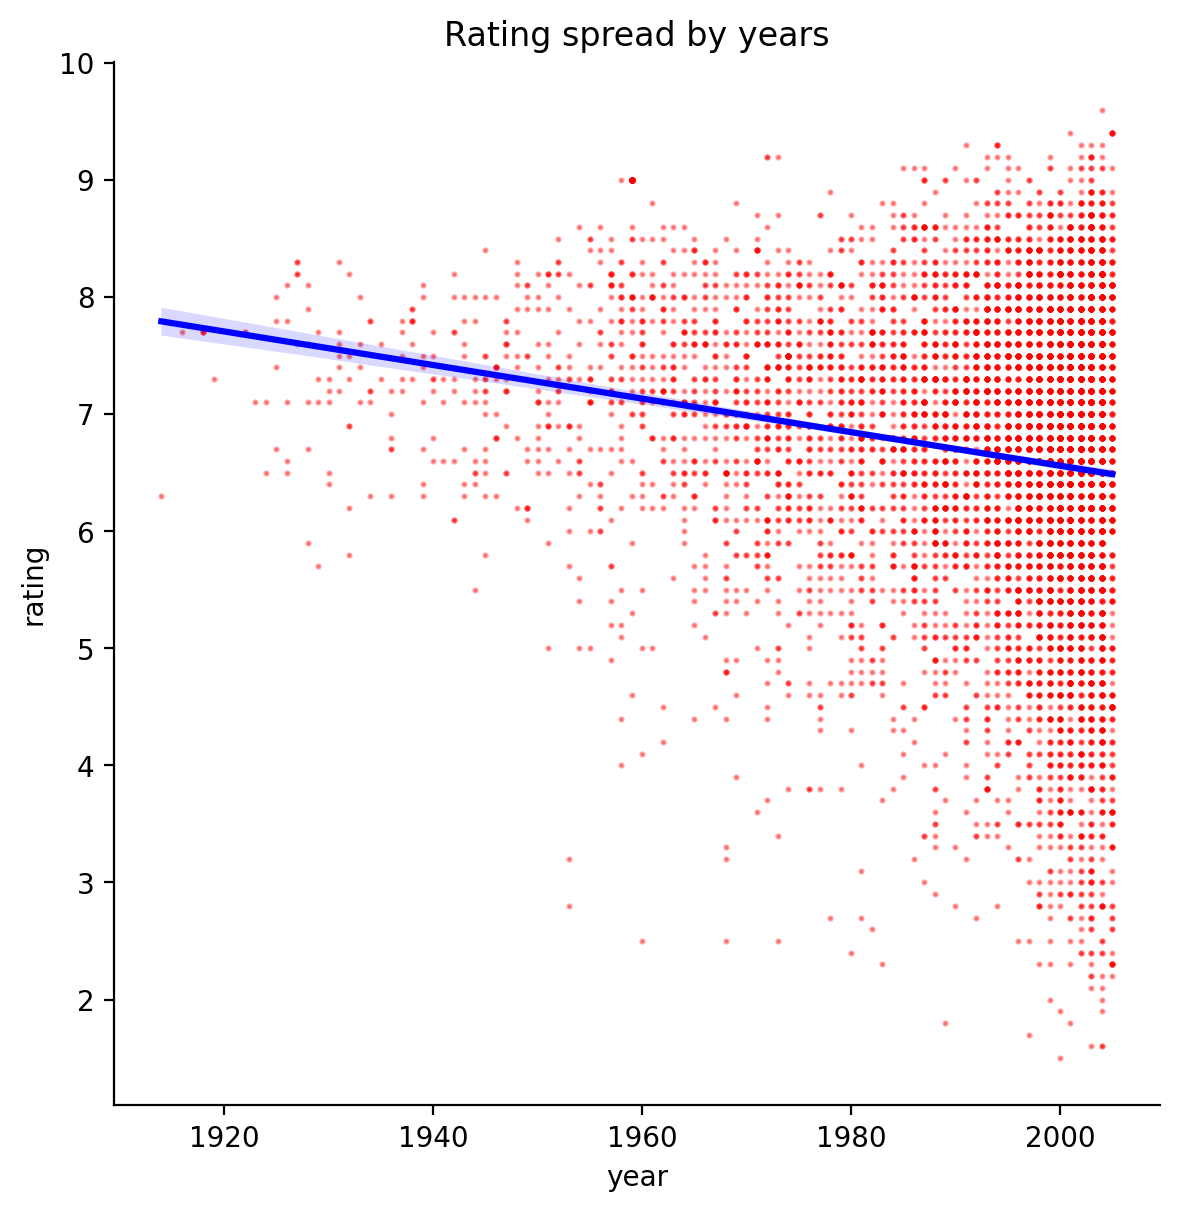

In [20]:
sns.lmplot(
    data=df, x="year", y="rating", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35, color='red'),
    line_kws={'color': 'blue'}
)
plt.title("Rating spread by years");

From the scatter plot, it illustrates that on average older films achieve better ratings than newer films. However, the graph also indicates that a wider spread of ratings will occur as the number of ratings we collected increases. Thus, the higher average ratings of older films may be attributed to limited number of rating we used.

### Distribution of Content Types
- How many contents in different types?
- Show the distribution of content types on a bar chart.

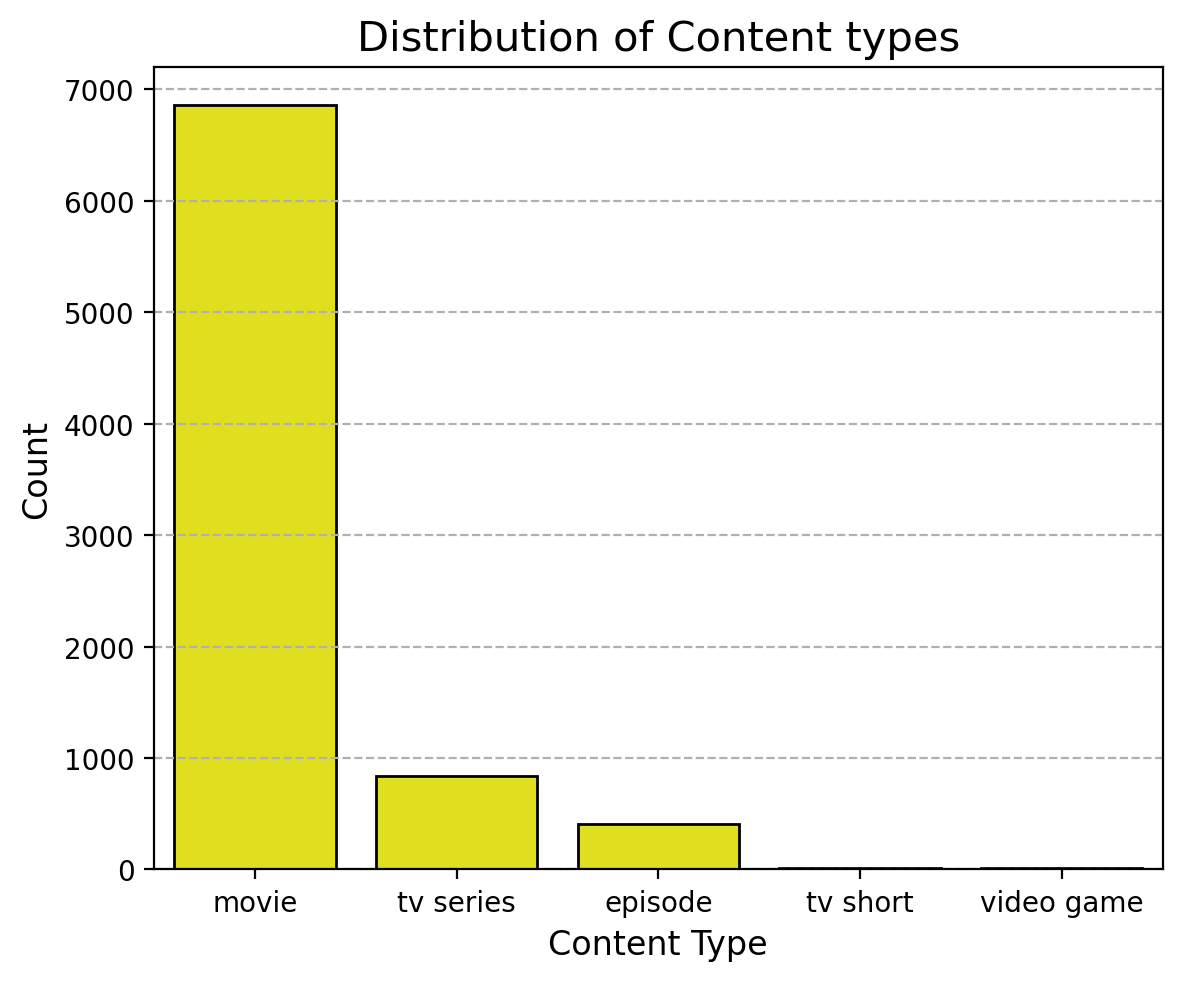

In [21]:
plt.figure(figsize=(6, 5))

kind_counts = df['kind'].value_counts()

sns.barplot(x=kind_counts.index, y=kind_counts.values, color= "yellow", ec='black')

plt.title("Distribution of Content types", fontsize=15)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

kind
episode       7.502195
movie         6.539548
tv series     7.401425
tv short      7.969231
video game    6.900000
Name: rating, dtype: float64


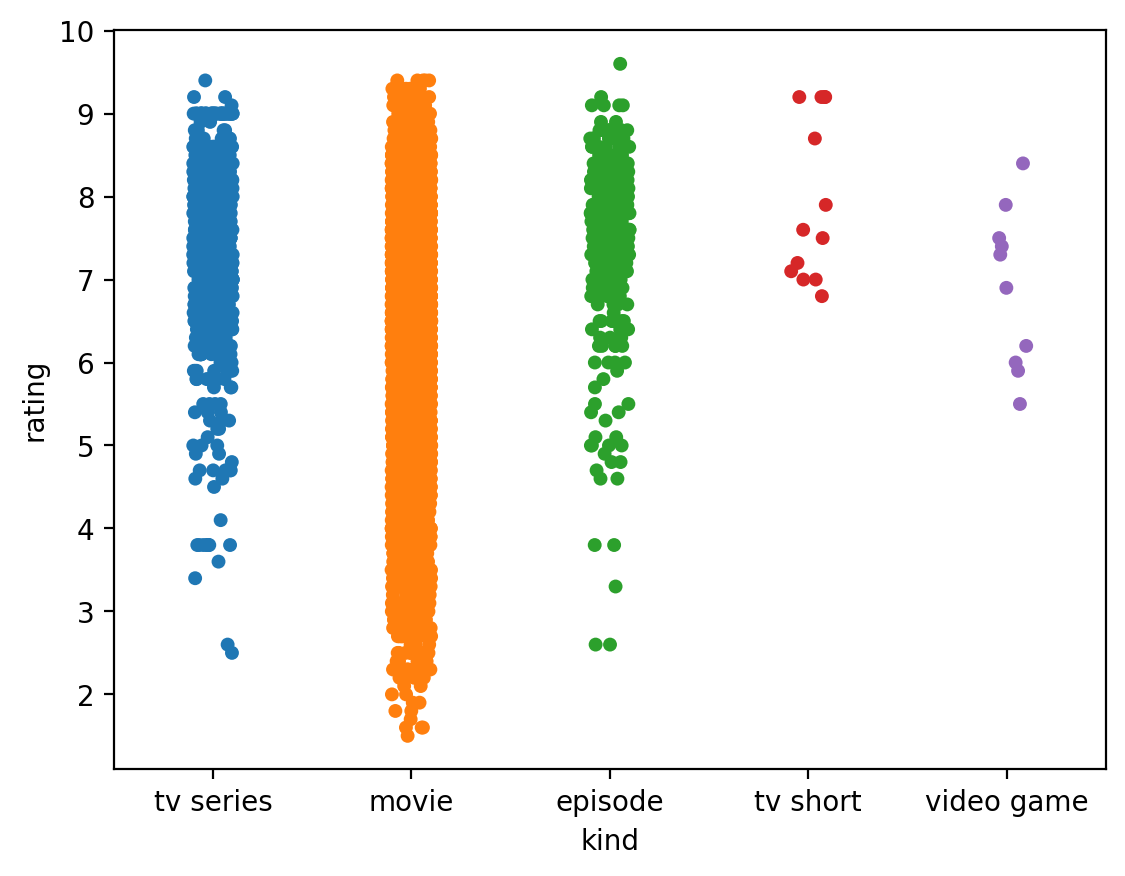

In [22]:
kind_mean_rating = df[df['rating'] != 0].groupby('kind')['rating'].mean()
print(kind_mean_rating)
sns.stripplot(x=df["kind"], y=df["rating"],size=5);

We find each kind of contents has a mean above 6, and there is no significant difference of ratings among the five kinds of contents.

### Distribution of Genres
- how the different genres of content are spread within the dataset?
- Show the distribution of genres on a bar chart.

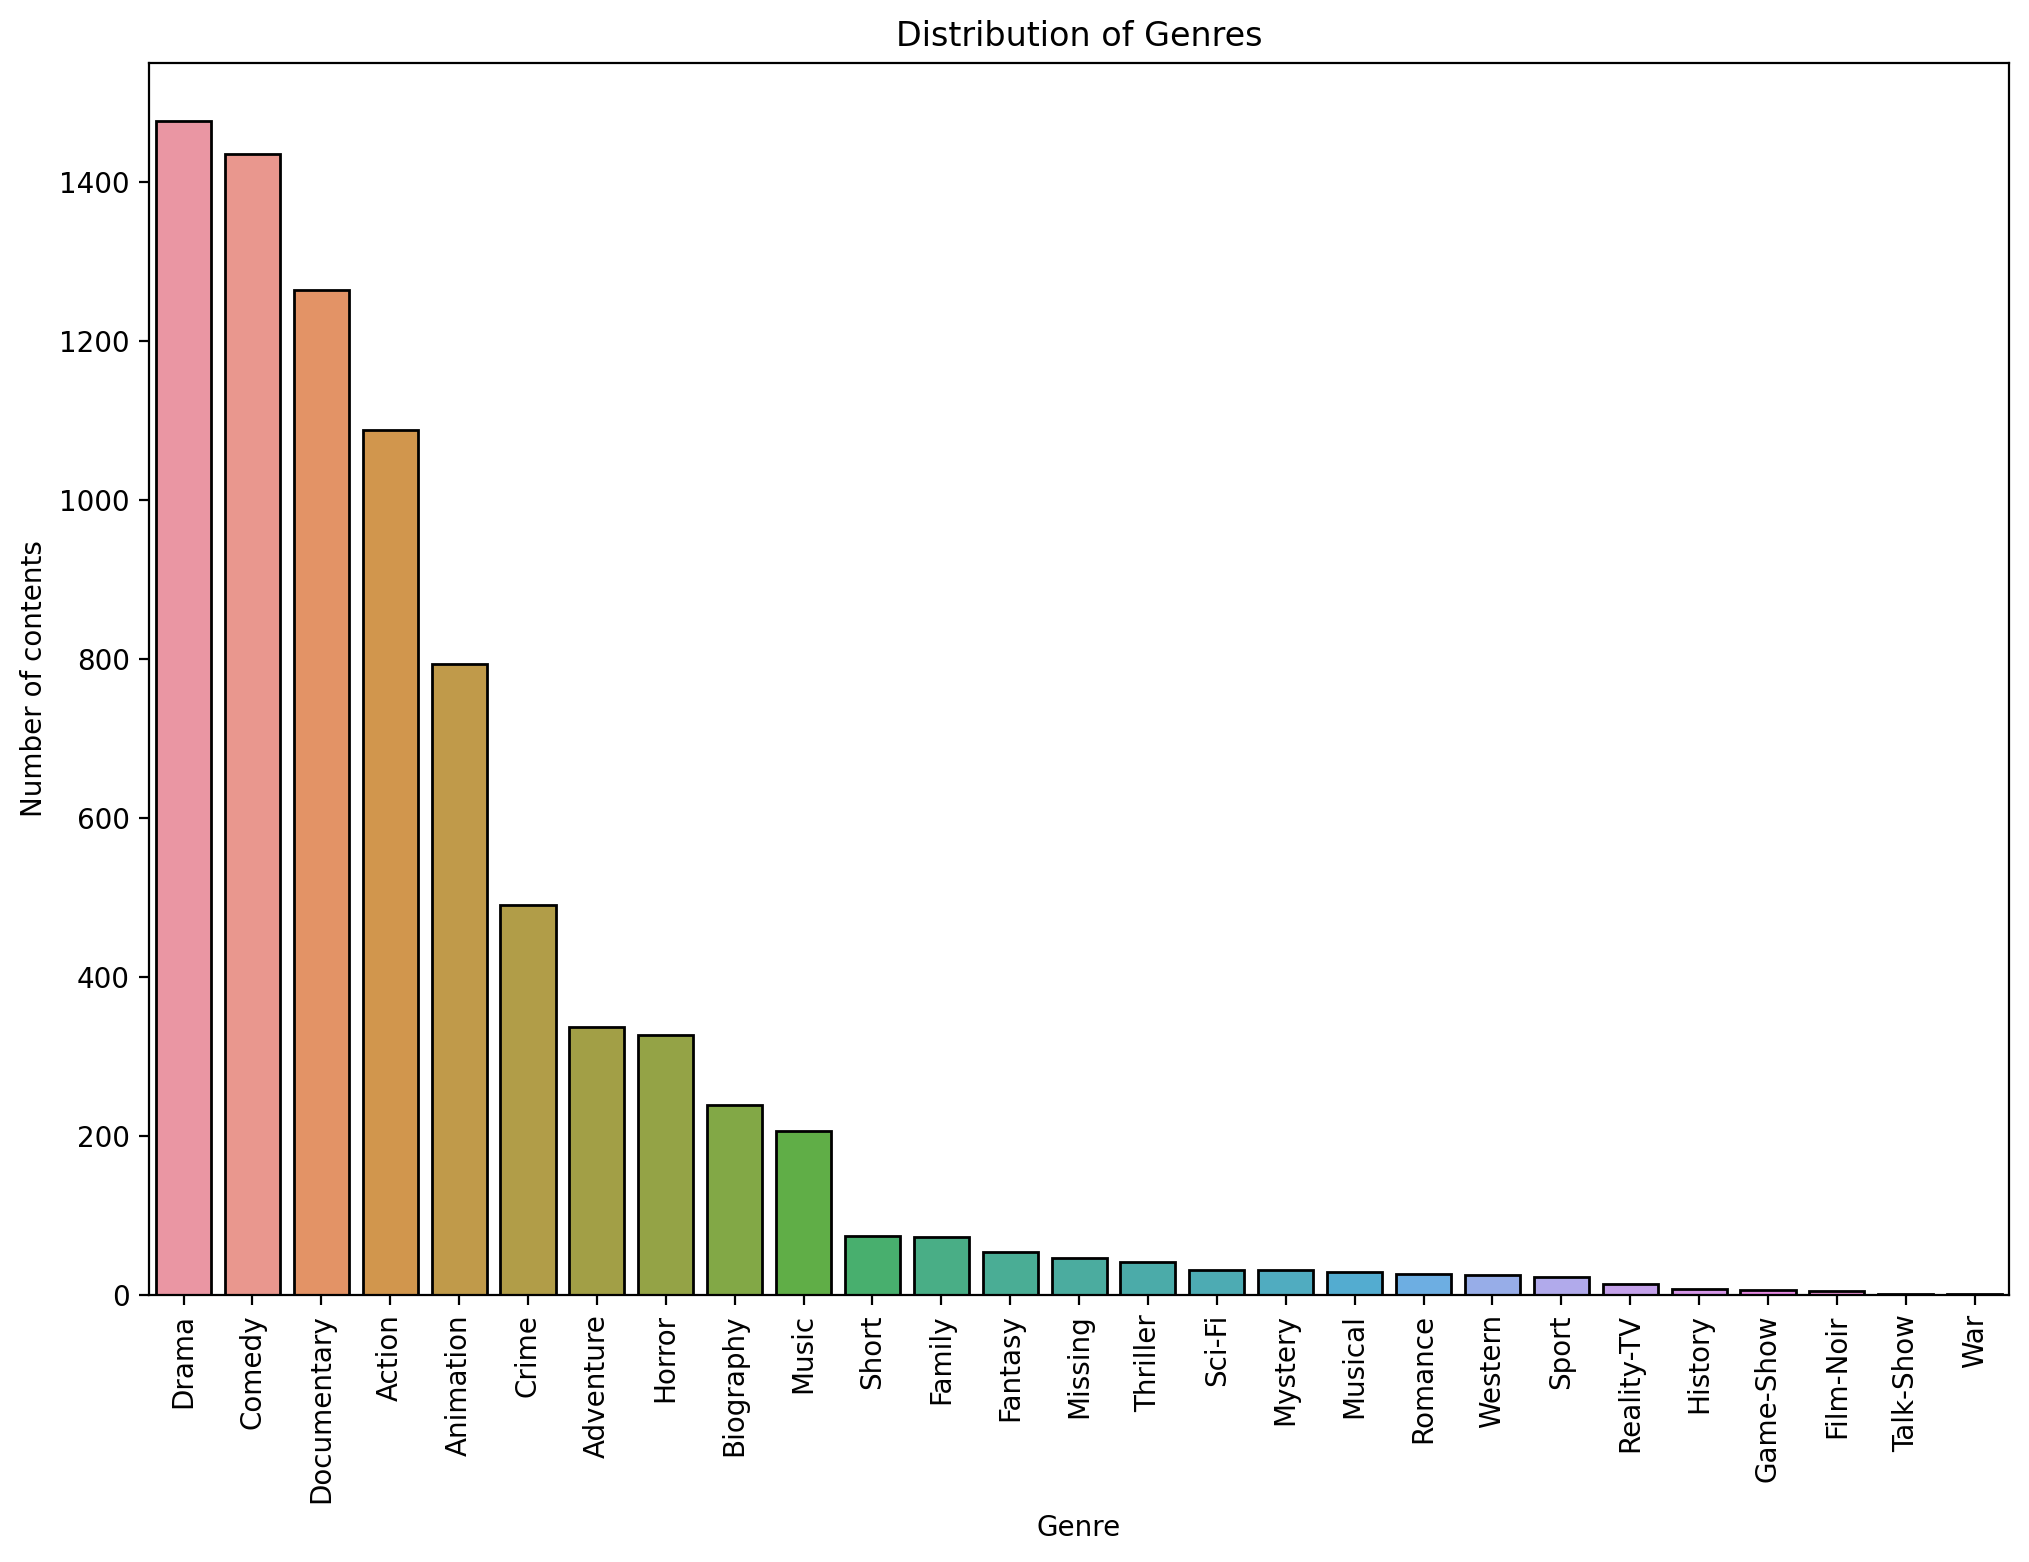

In [23]:
plt.figure(figsize=(12, 8))

genre_counts = df['genre_1'].value_counts()

sns.barplot(x=genre_counts.index, y=genre_counts.values, edgecolor='black')

plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of contents')
plt.xticks(rotation=90)
plt.show()

In [24]:
rating_by_genre=df.groupby("genre_1")["rating"].describe().sort_values(by="mean", ascending=False)
rating_by_genre

,count,mean,std,min,25%,50%,75%,max
genre_1,,,,,,,,
Music,206.0,8.023301,0.950554,2.5,7.700,8.20,8.600,9.3
History,7.0,7.971429,0.657557,6.8,7.600,8.40,8.450,8.5
Film-Noir,4.0,7.725000,0.287228,7.5,7.500,7.65,7.875,8.1
Documentary,1264.0,7.427136,0.940755,2.2,7.000,7.60,8.100,9.3
Short,74.0,7.248649,1.270017,4.2,6.625,7.30,7.900,9.4
Sport,22.0,7.240909,1.011203,5.2,6.600,7.10,7.925,9.3
War,1.0,7.200000,NaN,7.2,7.200,7.20,7.200,7.2
Missing,46.0,7.117391,1.316613,3.0,6.325,7.35,8.100,9.1
Biography,238.0,7.010924,0.701390,4.5,6.600,7.10,7.400,8.7


In [25]:
rating_by_genre_modified= rating_by_genre[rating_by_genre['count'] >= 100]
rating_by_genre_modified

,count,mean,std,min,25%,50%,75%,max
genre_1,,,,,,,,
Music,206.0,8.023301,0.950554,2.5,7.7,8.2,8.6,9.3
Documentary,1264.0,7.427136,0.940755,2.2,7.0,7.6,8.1,9.3
Biography,238.0,7.010924,0.701390,4.5,6.6,7.1,7.4,8.7
Animation,793.0,6.885498,0.928208,3.3,6.4,7.0,7.5,9.2
Crime,490.0,6.870000,1.112404,1.9,6.3,7.1,7.6,9.2
Drama,1476.0,6.789770,1.106062,2.3,6.2,6.9,7.5,9.3
Adventure,336.0,6.480952,1.294786,2.4,5.7,6.7,7.4,8.9
Comedy,1435.0,6.402230,1.195136,1.8,5.8,6.6,7.2,9.1
Action,1088.0,6.078676,1.389336,1.5,5.2,6.3,7.1,9.4


We find that among genres with more than 100 contents, music, documentary and biography genres get the top three highest average ratings.

### Rating Score based on Number of Votes
- Are there correlations between ratings and number of votes?
- As more and more people vote for a content, will the rating increases or decreases?

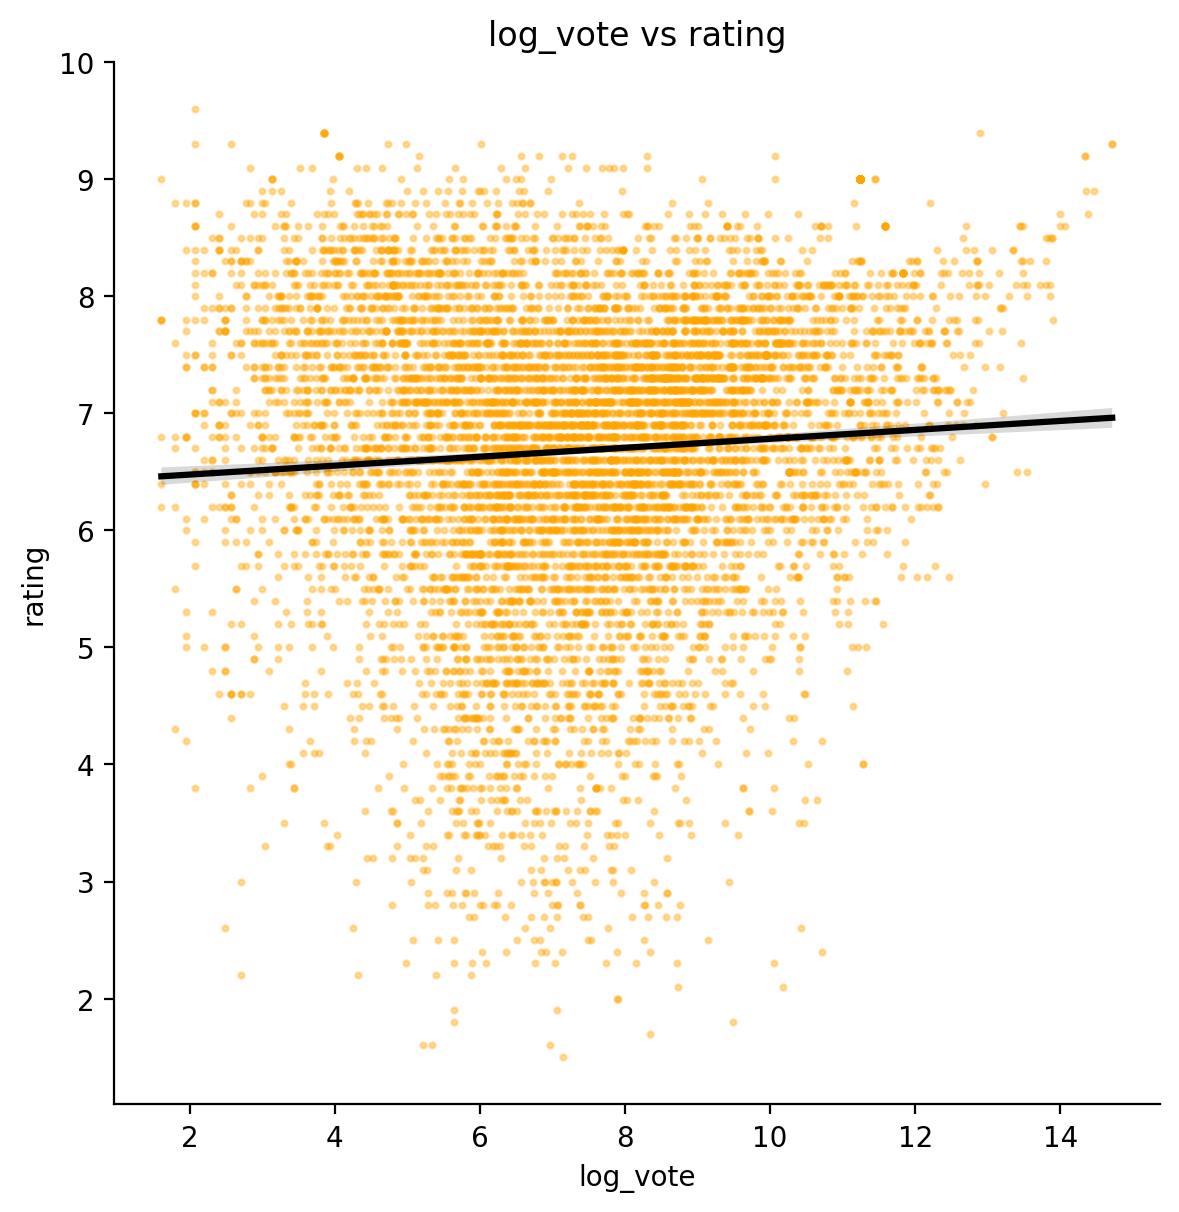

In [26]:
df["log_vote"] = np.log(df["vote"])
sns.lmplot(
    data=df, x="log_vote", y="rating", height=6,
    scatter_kws=dict(s=4, alpha=0.35, color='orange'),
    line_kws={'color': 'black'}
)
plt.title("log_vote vs rating");

The numbers of votes have a wide range, to better visualize the trend, we choose to use the logarithm of votes to plot the graph. We find that the number of votes have little correlation with ratings as the trend line is almost horizontal.

### Country of Production
- How many contents each country produced?
- Which country scored the highest ratings among audience?

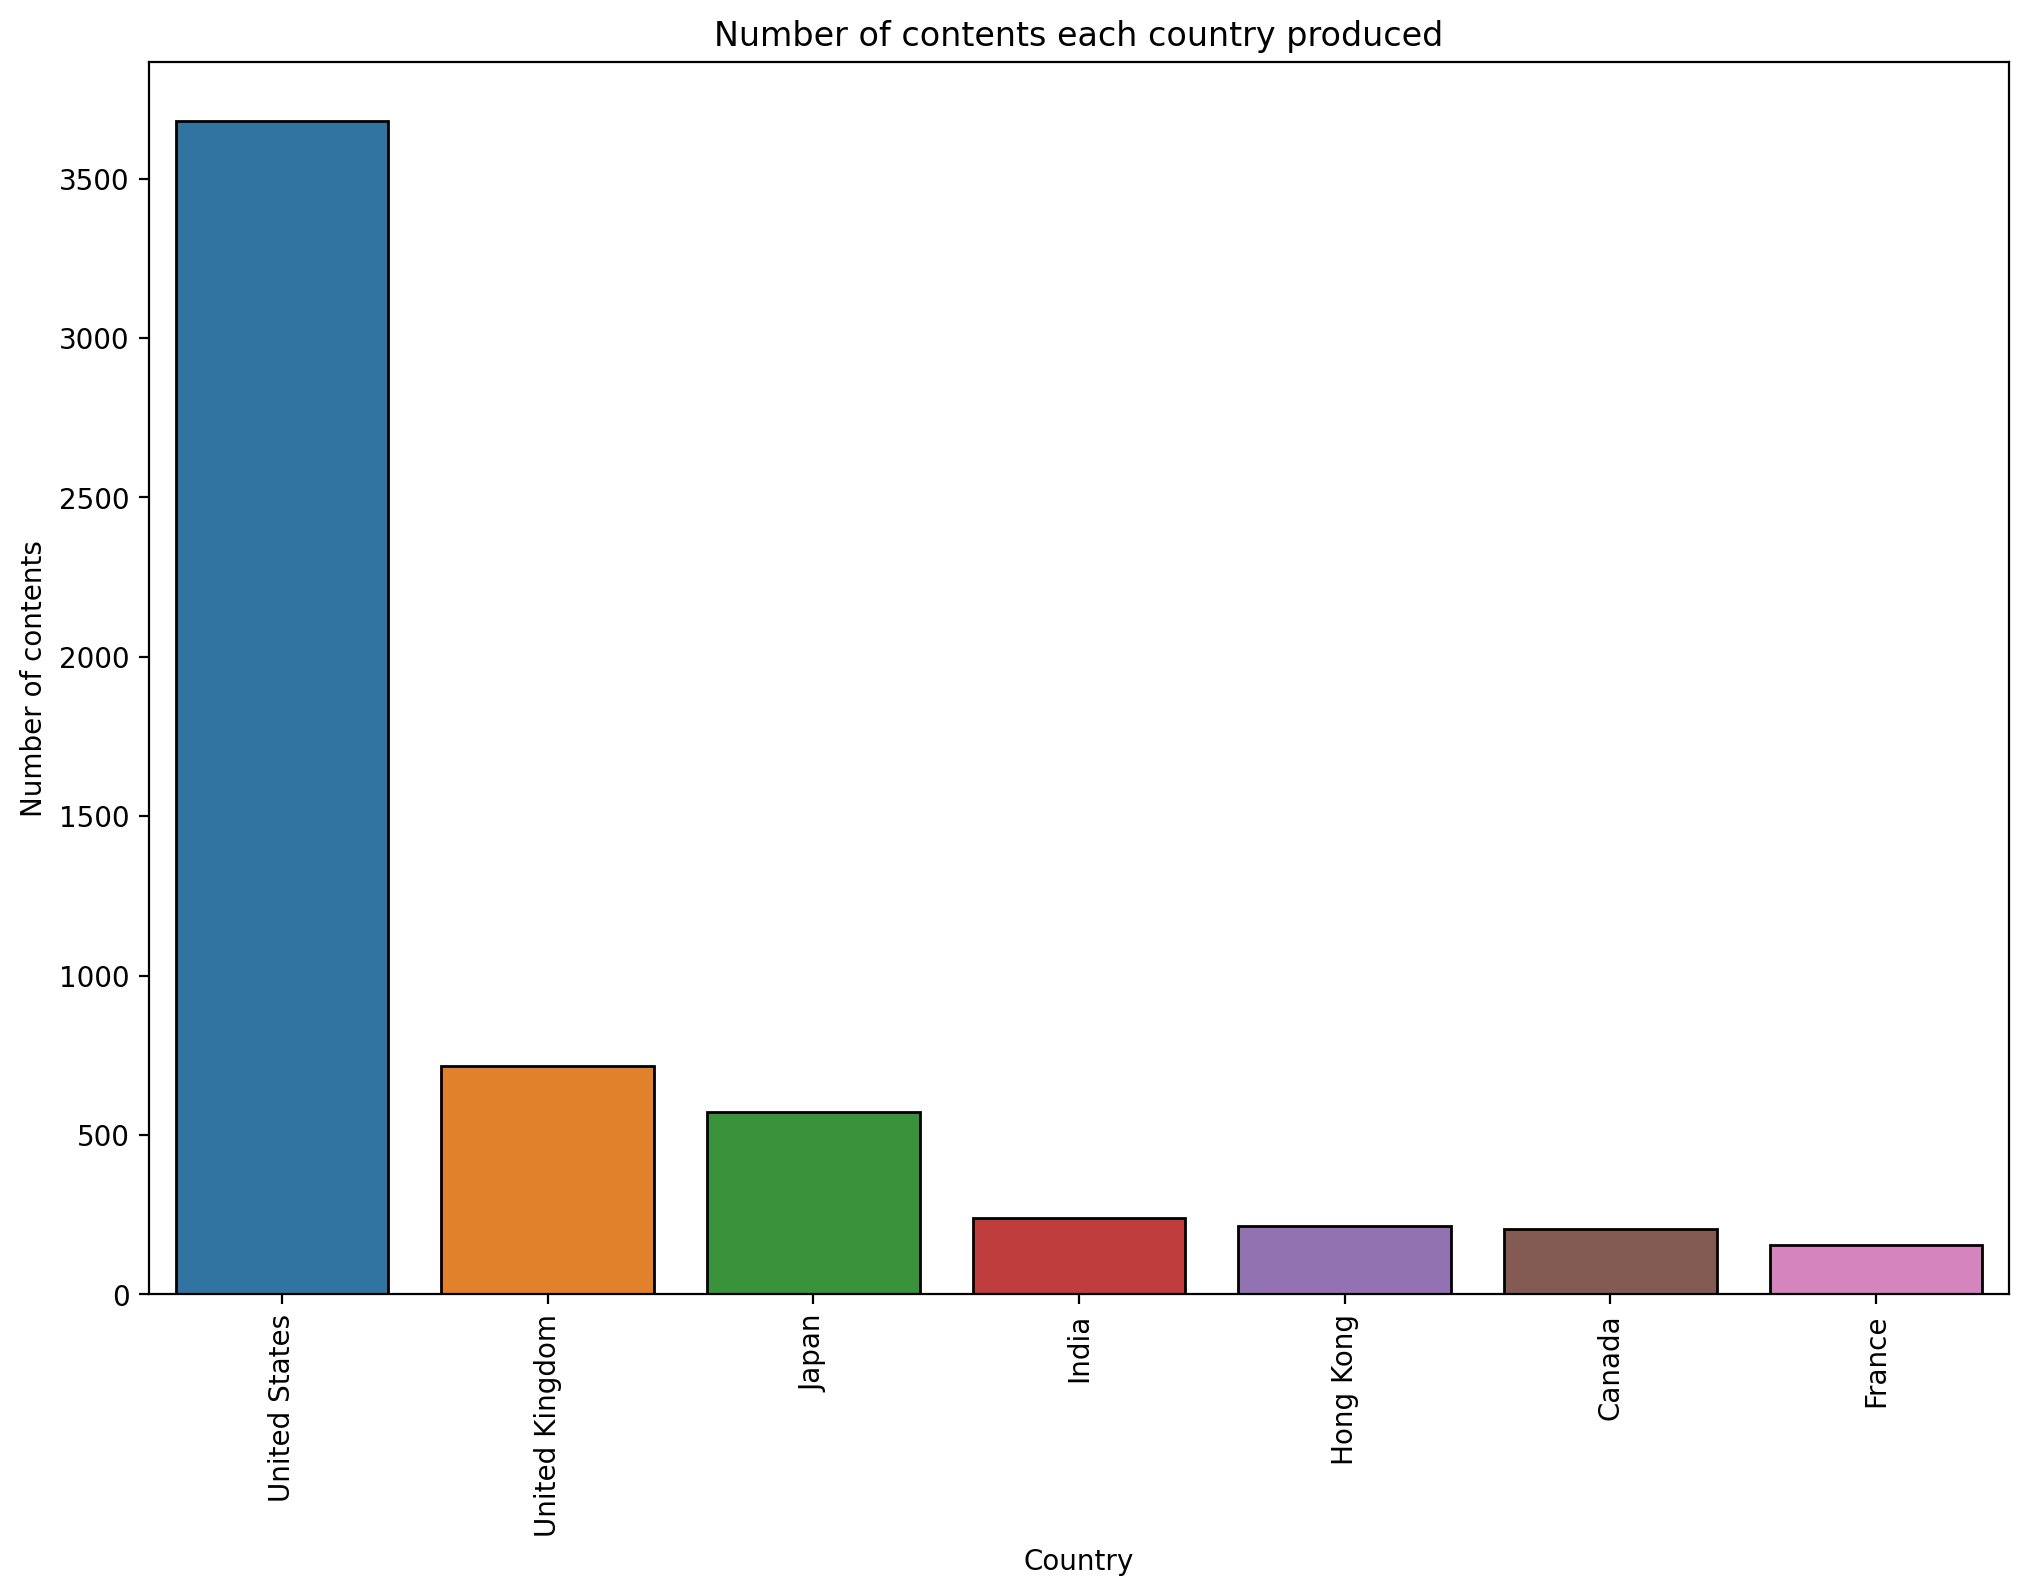

In [27]:
df1= df[df['country'] != 'Missing']
plt.figure(figsize=(12, 8))

country_count = df1['country'].value_counts()
country_count_mod=country_count[country_count > 150]

sns.barplot(x=country_count_mod.index, y=country_count_mod.values, edgecolor='black')

plt.title('Number of contents each country produced')
plt.xlabel('Country')
plt.ylabel('Number of contents')
plt.xticks(rotation=90)
plt.show()

In [28]:
rating_by_country=df1.groupby("country")["rating"].describe().sort_values(by="mean", ascending=False)
rating_by_country_mod=rating_by_country[rating_by_country['count'] >= 150]
rating_by_country_mod

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
United Kingdom,717.0,7.217434,1.000693,2.6,6.6,7.4,7.900,9.2
France,154.0,6.904545,0.868576,3.3,6.4,7.1,7.500,8.6
Japan,571.0,6.876007,0.927477,3.5,6.4,7.0,7.500,9.3
India,241.0,6.701660,1.113851,3.1,6.1,6.8,7.600,8.6
United States,3680.0,6.585408,1.411527,1.5,5.8,6.8,7.600,9.3
Hong Kong,216.0,6.386111,0.811196,4.0,5.9,6.4,7.000,8.1
Canada,206.0,5.964078,1.519137,1.6,4.9,6.2,7.175,8.8


We find that although United State produced the most contents on Netflix, the ratings of US content is lower than United Kingdom, which has the highest average ratings with smaller standard deviation :))

### Languages of the Contents
- Which languages of contents will help with the ratings?

In [29]:
df2= df[df['language'] != 'Missing']
language_ratings = df2.groupby("language")['rating'].describe()
language_ratings_mod=language_ratings[language_ratings["count"]>100].sort_values(by="mean", ascending=False)
language_ratings_mod

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
"English, French",120.0,6.945000,0.841652,4.2,6.4,7.0,7.425,9.0
French,173.0,6.780347,0.955197,3.1,6.2,6.9,7.500,8.6
Japanese,394.0,6.758883,0.956847,3.5,6.2,6.9,7.400,8.6
"English, Spanish",122.0,6.673770,0.982811,3.4,6.2,6.9,7.300,8.5
Hindi,192.0,6.606771,1.101406,3.1,5.8,6.7,7.500,8.5
English,4866.0,6.541903,1.409145,1.5,5.7,6.7,7.600,9.3


From this statistics table, we find that the contents in French language tend to achieve higher average scores compared to other contents. Moreover, for English contents, if they have other language versions such as French and Spanish, the average ratings will be higher than those with only English as the langauge.

### Top 10 Highly-rated Movies
- Based on the ratings, what are the top 10 best performed movies?
- Show the titles and ratings of Top 10 Highely-rated movies on a bar chart.

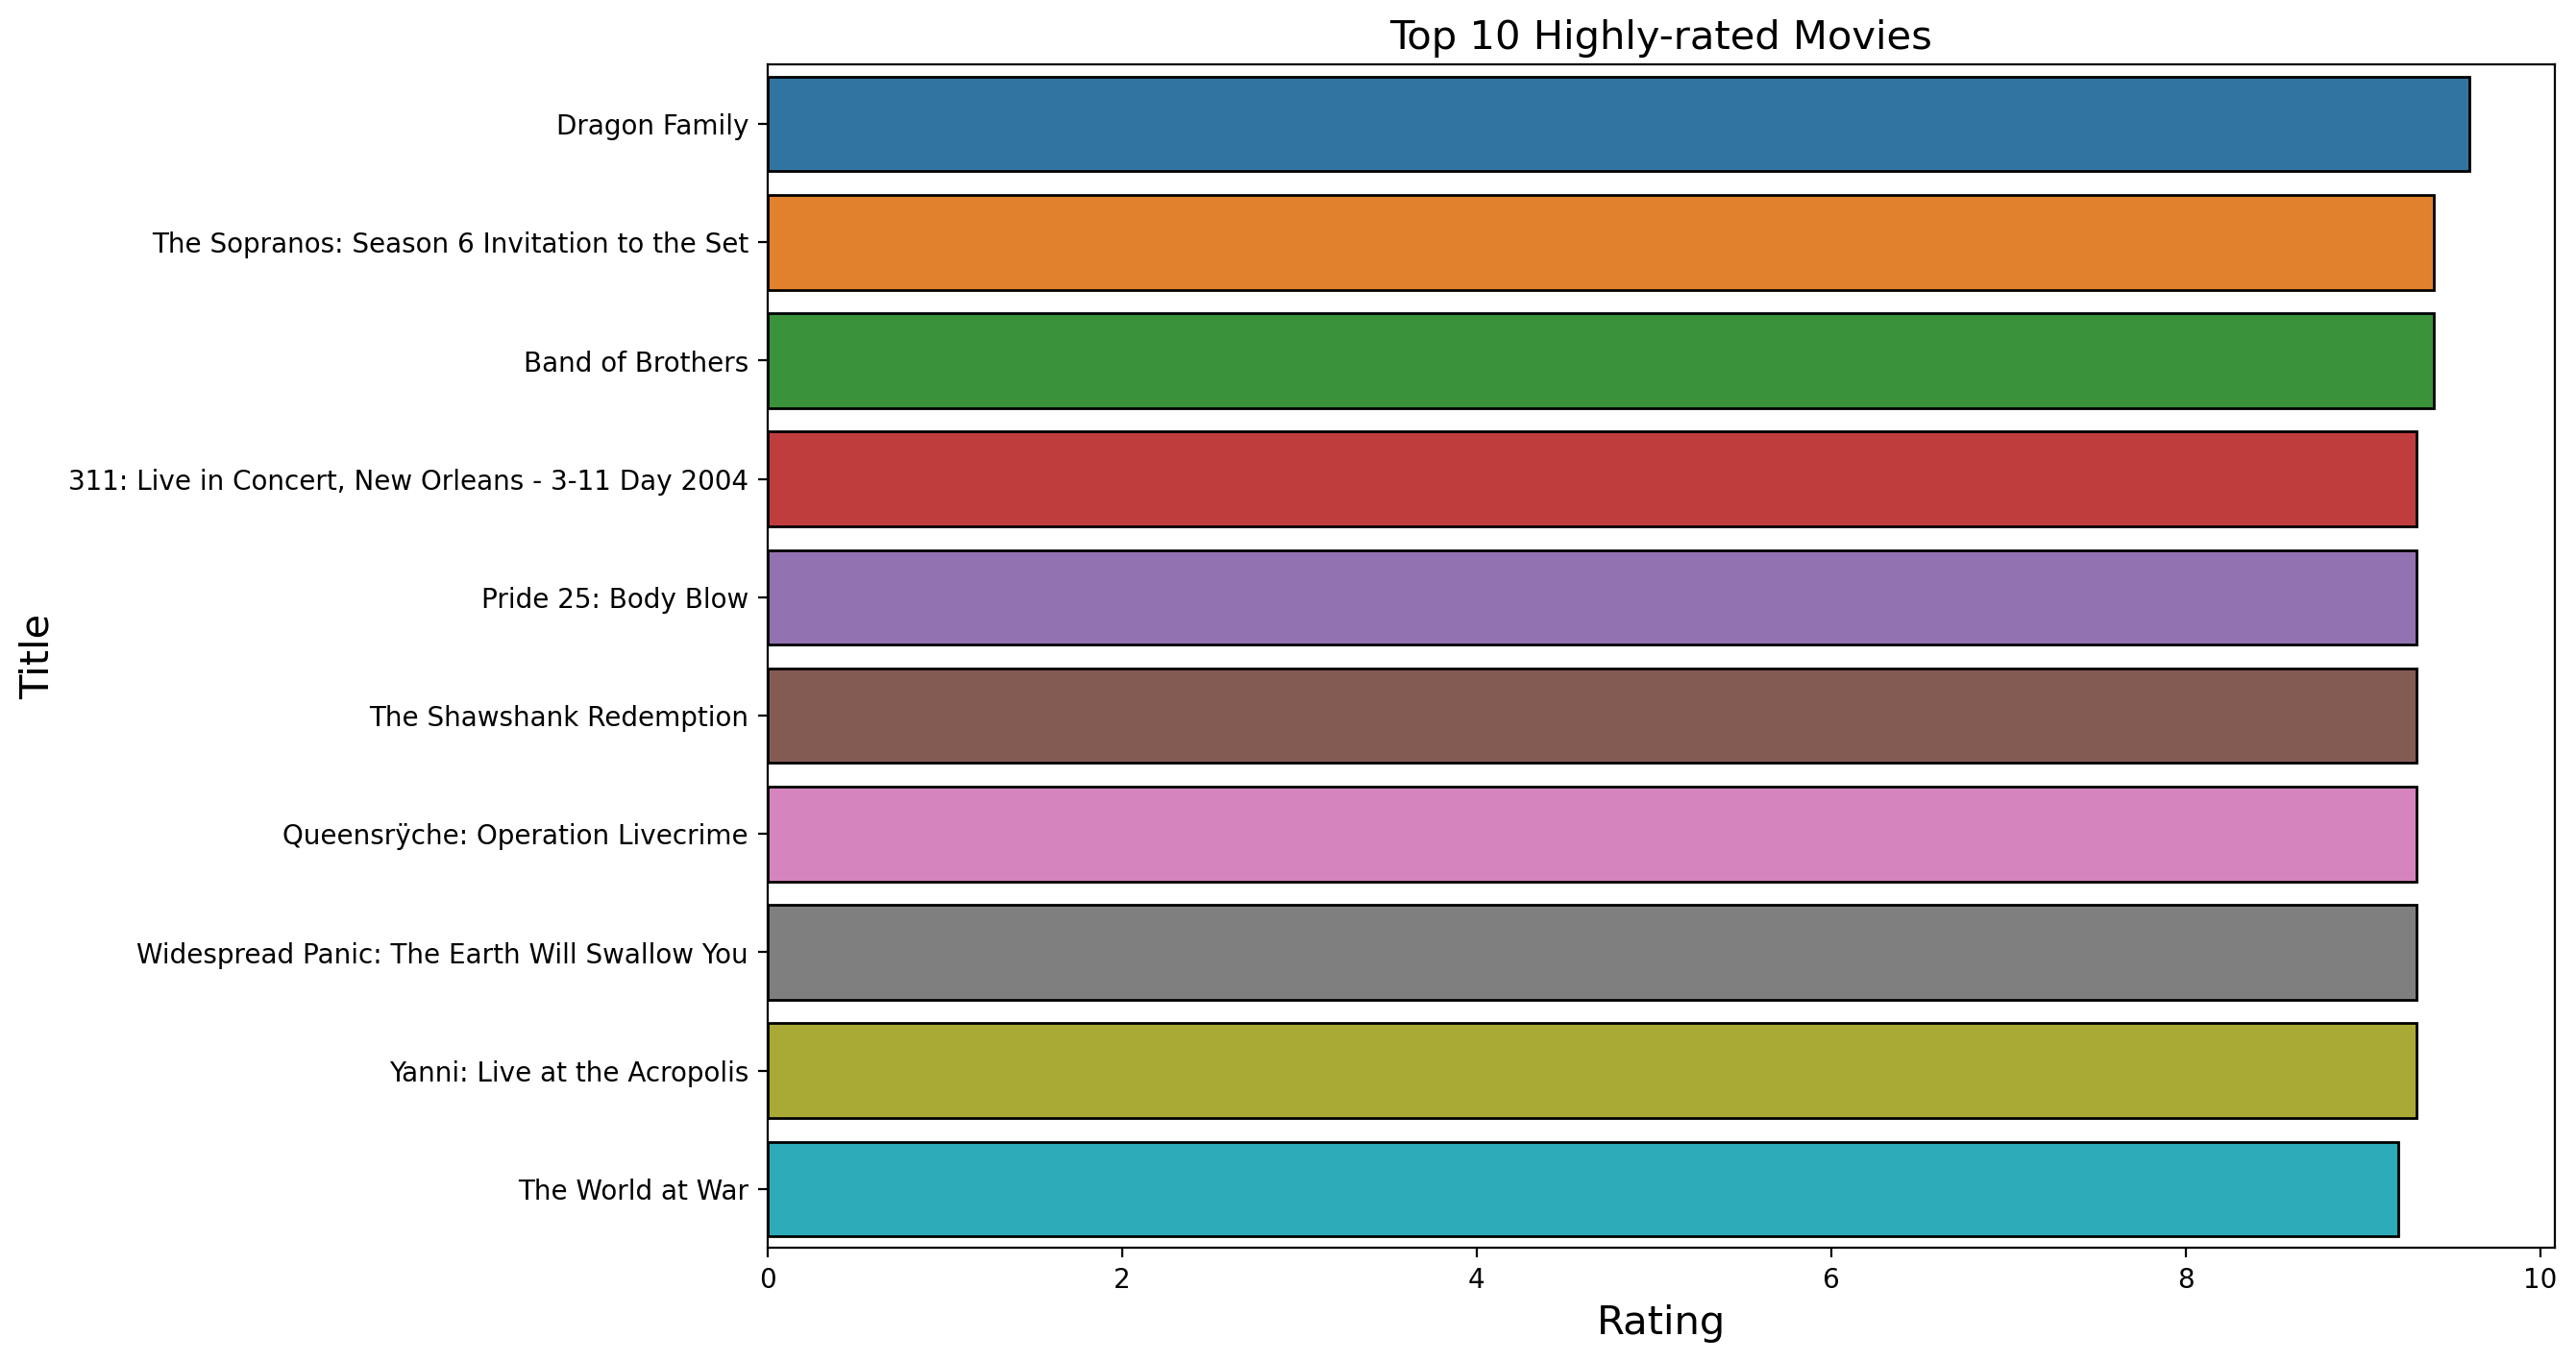

In [30]:
fig = plt.figure(figsize=(12, 8))

top_10_movies = df.sort_values("rating", ascending=False).iloc[:15]

sns.barplot(x='rating', y='title', data=top_10_movies, edgecolor='black')

plt.xlabel('Rating', fontsize=15)
plt.ylabel('Title', fontsize=15)
plt.title('Top 10 Highly-rated Movies', fontsize=15)
plt.show()

### Top 10 Directors
- Who are the top 10 directors based on average rating scores?
- Show the Top 10 Directors and their scores on a bar chart.

director
Gina Rubinstein                    9.6
Sammy Silver                       9.4
Christopher Hanson                 9.3
George Veras                       9.3
Marc Scarpa, Sean M. Stuart        9.3
David Zimring                      9.2
Rob Sheridan                       9.2
Stephen Hillenburg, Sherm Cohen    9.2
Yuji Morihara, Mike Portnoy        9.2
Brian Large                        9.1
Name: rating, dtype: float64


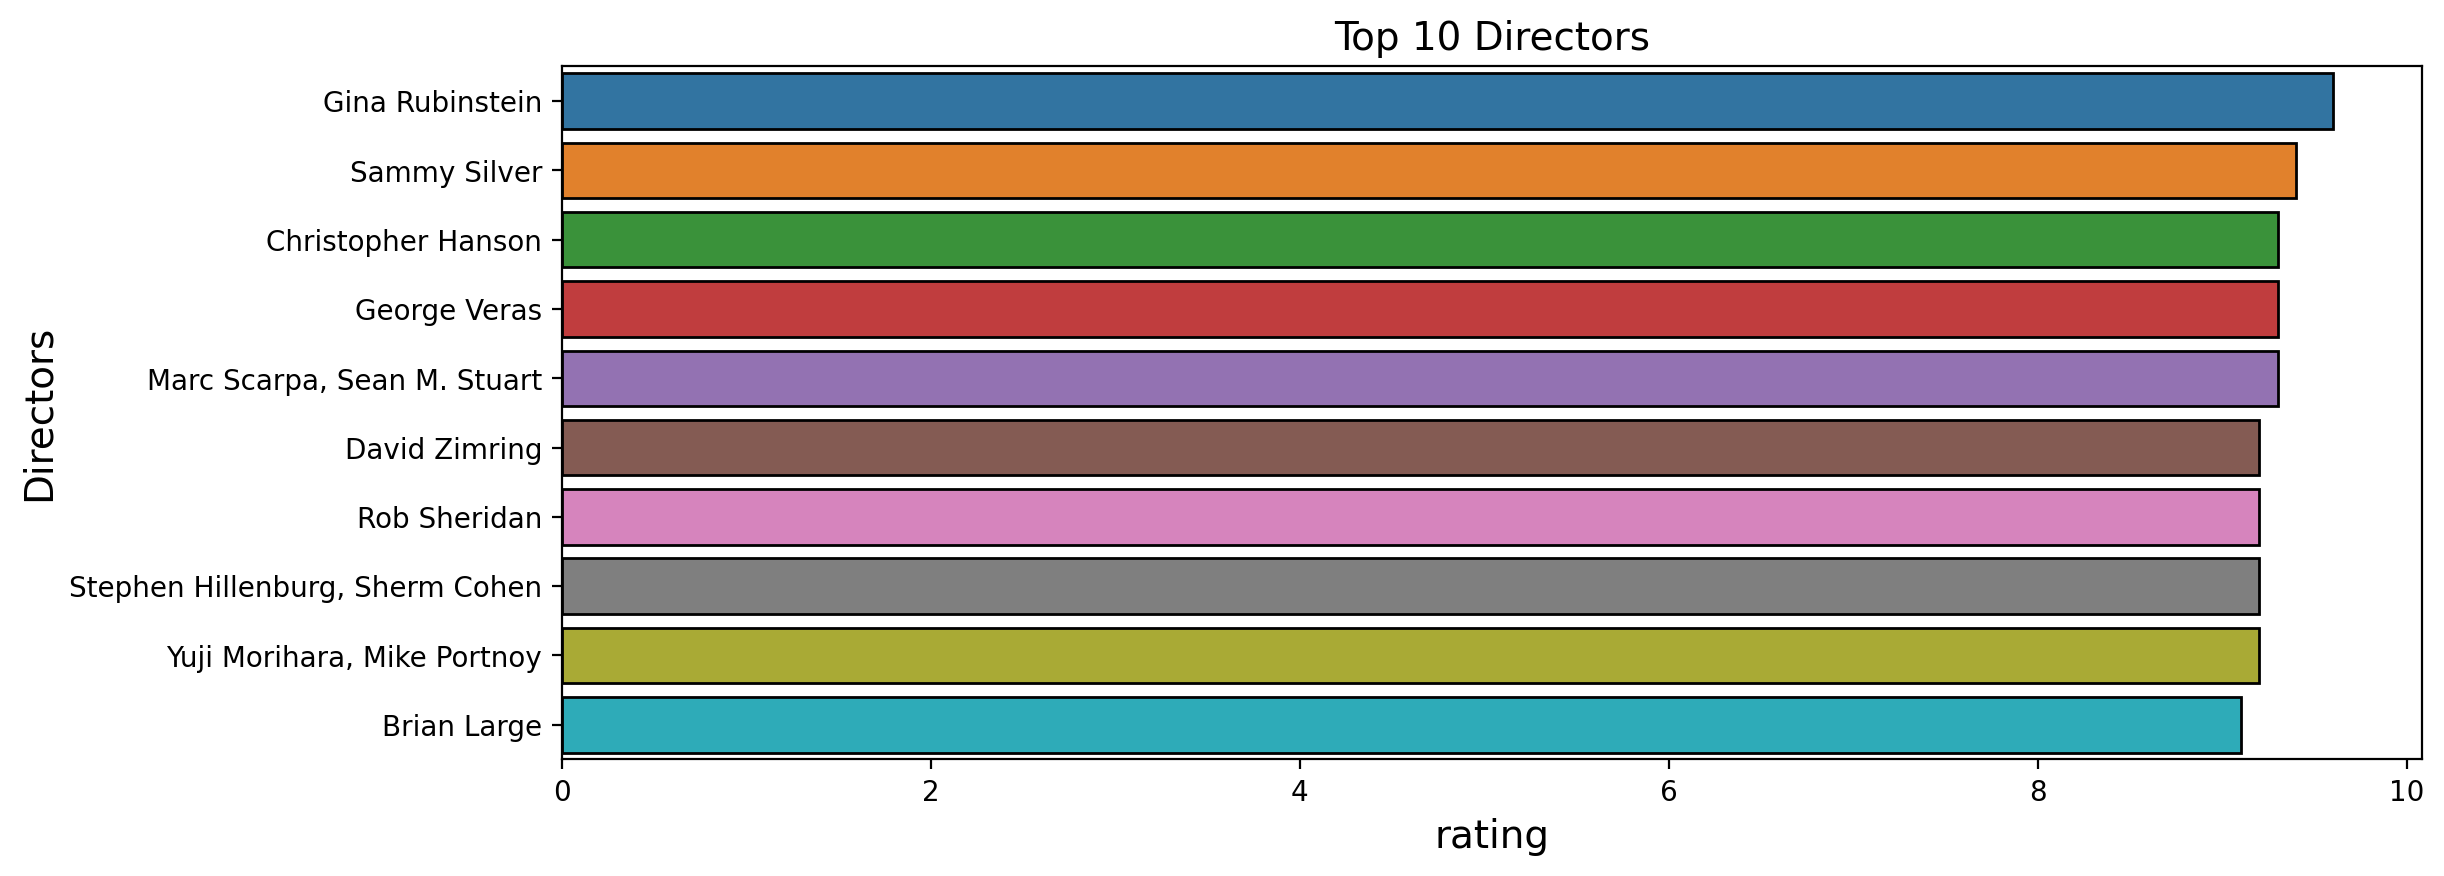

In [31]:
plt.figure(figsize=(12, 4.5))

top_10_directors = df[df['director'] != 'Missing'].groupby('director')['rating'].mean().nlargest(10)
print(top_10_directors)

ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, edgecolor='black')
plt.title("Top 10 Directors", fontsize=14)
plt.xlabel('rating', fontsize=14)
plt.ylabel('Directors', fontsize=14)
plt.show()

### Duration of the Contents
- Does the duration (which is the 'runtime' column) of the contents influence their ratings?
- Visualize the data on the scatter plot to see the trend.

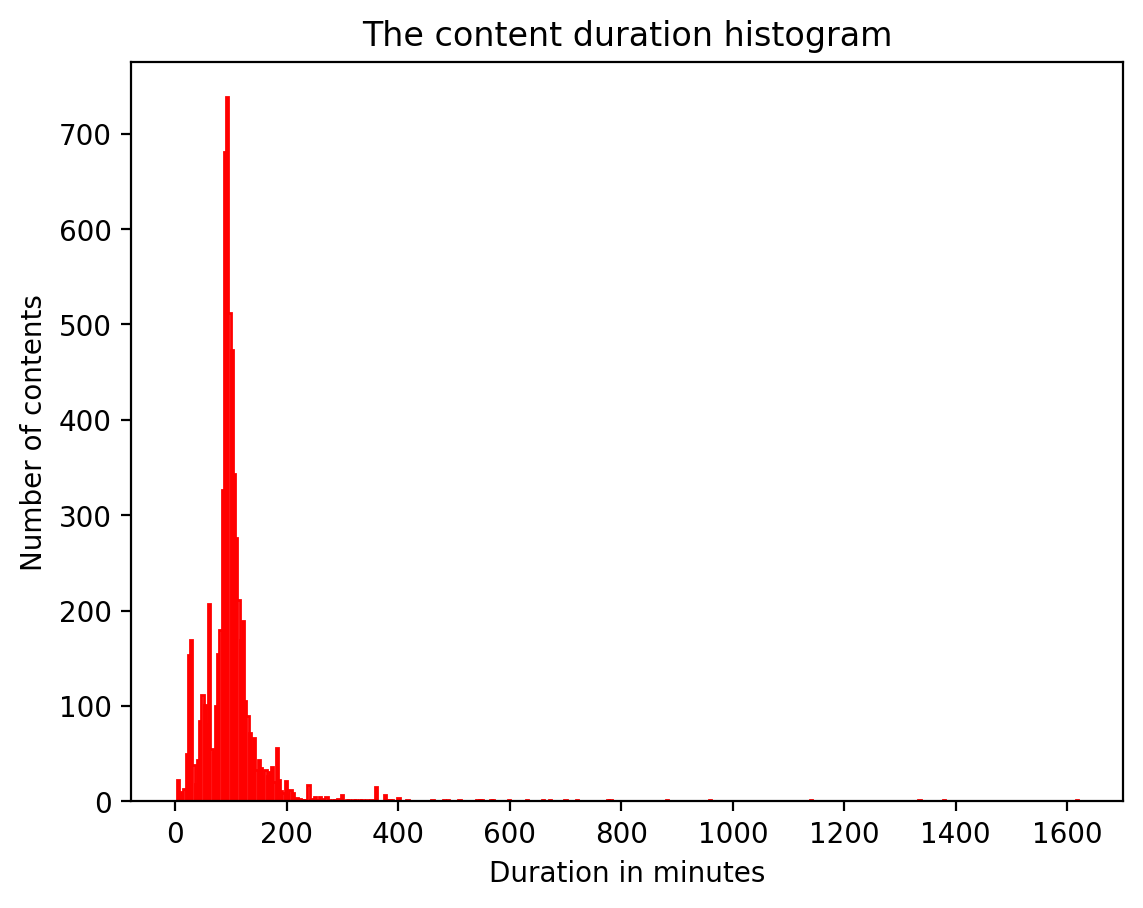

In [32]:
df_runtime=df.dropna(subset=["runtime"])
plt.hist(df_runtime['runtime'], bins=400,color="pink",edgecolor='red')
plt.xlabel("Duration in minutes")
plt.ylabel("Number of contents")
plt.title('The content duration histogram')
plt.show()

The graph shows that most of the contents are within 400 minutes, so we decide to generate a new graph which eliminates the outliers to make the classification clearer.

/var/folders/4k/821crq454k35xdcz048rj_f40000gn/T/ipykernel_28837/1295276409.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new=df_runtime[df['runtime']<400]


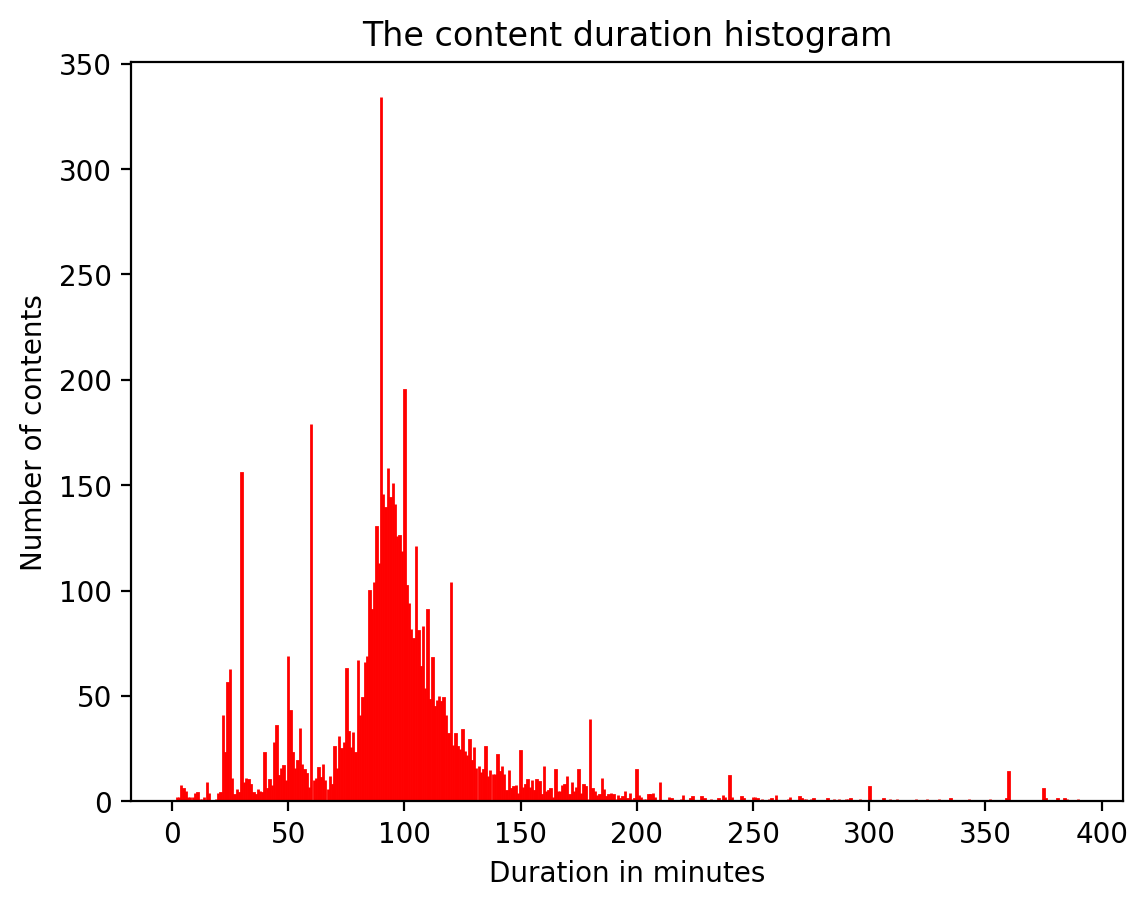

In [33]:
df_new=df_runtime[df['runtime']<400]
plt.hist(df_new['runtime'], bins=2000,color="pink",edgecolor='red')
plt.xlabel("Duration in minutes")
plt.ylabel("Number of contents")
plt.title('The content duration histogram')
plt.show()

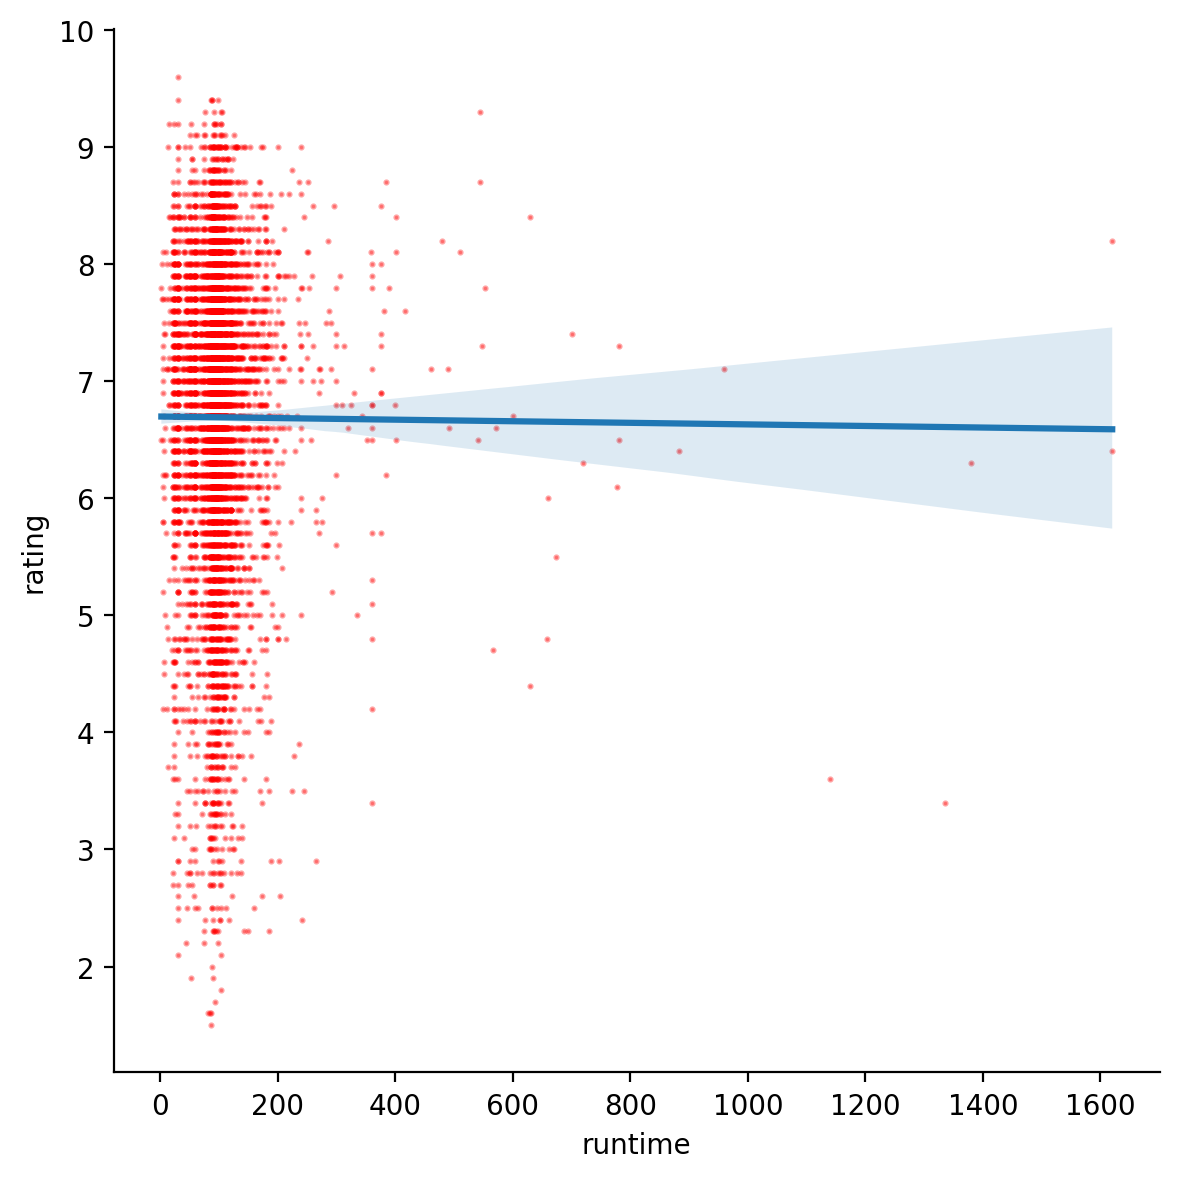

In [34]:
#Scatter plot to visualize the rating and runtime data.
sns.lmplot(
    data=df_runtime, x="runtime", y="rating", height=6, 
    scatter_kws=dict(s=1.5, alpha=0.35, color="red")
);

By visualizing all the content durations (runtime) and their ratings on the scatter plot, we can see that the trend line is alomost horizontal, which indicates that the rating has little correlation with the content duration, so the duration is not a influencing factor to its rating.


## 3. Ordinary Least Squares (OLS) regression model
In this section, we are going to build regression model based on several factors and make predictions about the ratings of future contents.

### Construct model using "genre_1" as independent variable.
In this dataframe, most of the independent variables are categorical data, so we first create new dummy variables to record the categorical data, which is genre_1 in this case.

In [35]:
dummy_variables = pd.get_dummies(df['genre_1'], prefix='genre')

# Concatenate the dummy variables with the dependent variable
df_with_dummies = pd.concat([df['rating'], dummy_variables], axis=1)

# Fit the regression model
X = df_with_dummies.iloc[:, 1:]  
y = df_with_dummies.iloc[:, 0]   
X = sm.add_constant(X)           
model = sm.OLS(y, X)             
results = model.fit()            
mse = results.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 106.6374896578348


### Predict ratings for contents in *Drama* and *Documentary* genres.

In [36]:
dummy_columns = results.model.exog_names[1:]
prediction_input = {'const': 1, 'genre_Drama': 1}

for column in dummy_columns:
    if column not in prediction_input:
        prediction_input[column] = 0
        
prediction_df = pd.DataFrame(prediction_input, index=[0])
prediction_df = prediction_df[results.model.exog_names]
predicted_rating = results.predict(prediction_df)

print("Predicted rating for genre_1 = Drama:", predicted_rating[0])

Predicted rating for genre_1 = Drama: 6.789769647696452


In [37]:
prediction_input = pd.DataFrame({'const': 1, 'genre_Documentary': 1}, index=[0])
missing_columns = set(X.columns) - set(prediction_input.columns)
for column in missing_columns:
    prediction_input[column] = 0
prediction_input = prediction_input[X.columns]

# Make the prediction
predicted_rating = results.predict(prediction_input)

# Print the predicted rating
print("Predicted rating for genre_1 = Documentary:", predicted_rating[0])

Predicted rating for genre_1 = Documentary: 7.427136075949349


### Rebuild the model by adding "country" as the second independent variable.

In [38]:
dummy_genre = pd.get_dummies(df['genre_1'], prefix='genre')
dummy_country = pd.get_dummies(df['country'], prefix='country')

df_with_dummies = pd.concat([df['rating'], dummy_genre, dummy_country], axis=1)

X = df_with_dummies.iloc[:, 1:]  
y = df_with_dummies.iloc[:, 0]   
X = sm.add_constant(X)           
model = sm.OLS(y, X)             
results = model.fit()            
mse = results.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 6.317121123952207


### Predict rating for *Japan Animation* contents

In [39]:
# Create a prediction input DataFrame with the "Japan" country and "Comedy" genre
prediction_input = pd.DataFrame({'const': 1, 'genre_Animation': 1, 'country_Japan': 1}, index=[0])

missing_columns = set(X.columns) - set(prediction_input.columns)
for column in missing_columns:
    prediction_input[column] = 0

prediction_input = prediction_input[X.columns]

predicted_rating = results.predict(prediction_input)

print("Predicted rating for country = Japan and genre_1 = Animation:", predicted_rating[0])

Predicted rating for country = Japan and genre_1 = Animation: 7.044995291936133


### Predict rating for *United States Action* contents

In [40]:
prediction_input = pd.DataFrame({'const': 1, 'genre_Action': 1, 'country_United State': 1}, index=[0])

missing_columns = set(X.columns) - set(prediction_input.columns)
for column in missing_columns:
    prediction_input[column] = 0

prediction_input = prediction_input[X.columns]

predicted_rating = results.predict(prediction_input)

print("Predicted rating for country = United State and genre_1 = Action:", predicted_rating[0])

Predicted rating for country = United State and genre_1 = Action: 6.133005083154754


## 4. Summary and Recommendation

1.We find that the genre, country of production and language can affact the rating most.

2.United Kingdom and France are tend to produce contents with higher average ratings than the United States.

3.To improve ratings for contents with only English version, releasing other language versions such as French and Spanish contribute to their ratings. Also, contents with more languages tend to gain higher average ratings than those with single language. It might because the diversity of languages increases the amount of audiences and the effects of their personal bias and preferences would be reduced to a large extent.

## 5. References


Guna, A. (2021). Netflix Prize Shows Information (9000 Shows). Kaggle. https://www.kaggle.com/datasets/akashguna/netflix-prize-shows-information?select=imdb_processed.csv

Netflix. (2018). Netflix Prize data. Kaggle. https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data